This project, "Crime Rate Analysis," is conducted as part of my internship at Internee.pk, using a dataset obtained from Kaggle. The primary objective of this analysis is to identify patterns and factors influencing crime rates over approximately 40 years, from 1975 to 2015, and to propose strategies for crime prevention.

This Analysis based on 3 Steps

1. Data Cleaning and Preparation

2. Exploratory Data Analysis (EDA)

3. Results Interpretation and Strategies for Crime Prevention

Based on the observed trends, several strategies are suggested to prevent crime.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("report.csv")

In [ ]:
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

In [ ]:
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


**1. Data Cleaning and Preparation**

In [ ]:
# Check for missing values
print(df.isnull().sum())

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64


In [ ]:
# Drop any rows with missing values (if applicable)
df = df.dropna()

In [ ]:
# Convert 'report_year' to datetime if it's not already
df['report_year'] = pd.to_datetime(df['report_year'], format='%Y')

In [ ]:
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975-01-01,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975-01-01,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975-01-01,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975-01-01,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975-01-01,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


**2. Exploratory Data Analysis (EDA)**

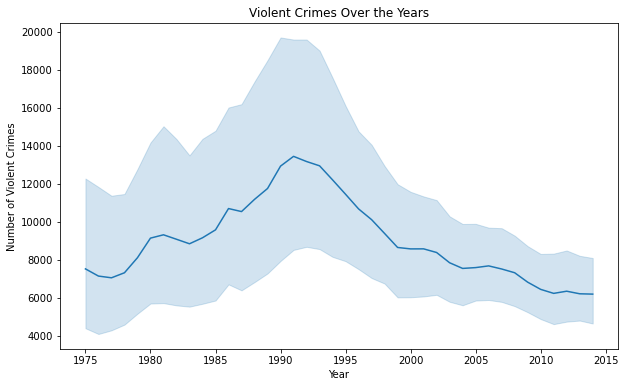

In [ ]:
# Plot violent crimes over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='report_year', y='violent_crimes')
plt.title('Violent Crimes Over the Years')
plt.xlabel('Year').
plt.ylabel('Number of Violent Crimes')
plt.show()

**Violent Crimes Over the Years**

*Trend:* A significant peak in violent crimes is observed around the mid-1990s, followed by a gradual decline.
    
*Interpretation:* This suggests a potential correlation between societal factors or law enforcement strategies implemented in the mid-1990s and the subsequent decrease in violent crime.

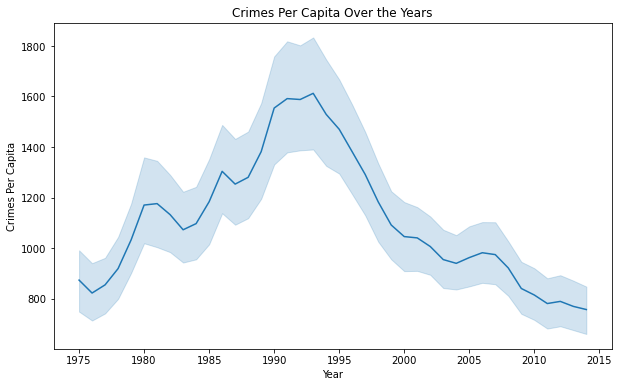

In [ ]:
# Plot crimes per capita over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='report_year', y='crimes_percapita')
plt.title('Crimes Per Capita Over the Years')
plt.xlabel('Year')
plt.ylabel('Crimes Per Capita')
plt.show()

**Crimes Per Capita Over the Years**

*Trend:* A similar pattern to the overall violent crimes is observed, with a peak around the mid-1990s and a subsequent decline.
    
*Interpretation: *While the total number of violent crimes decreased, the rate of crimes per capita also followed a similar trend. This could indicate changes in population density or other demographic factors influencing the crime rate.

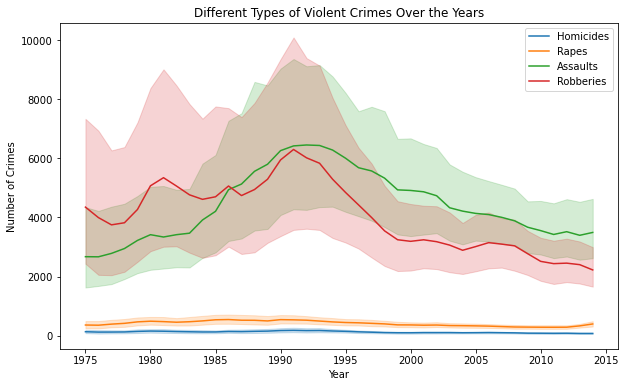

In [ ]:
# Plot different types of violent crimes over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='report_year', y='homicides', label='Homicides')
sns.lineplot(data=df, x='report_year', y='rapes', label='Rapes')
sns.lineplot(data=df, x='report_year', y='assaults', label='Assaults')
sns.lineplot(data=df, x='report_year', y='robberies', label='Robberies')
plt.title('Different Types of Violent Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

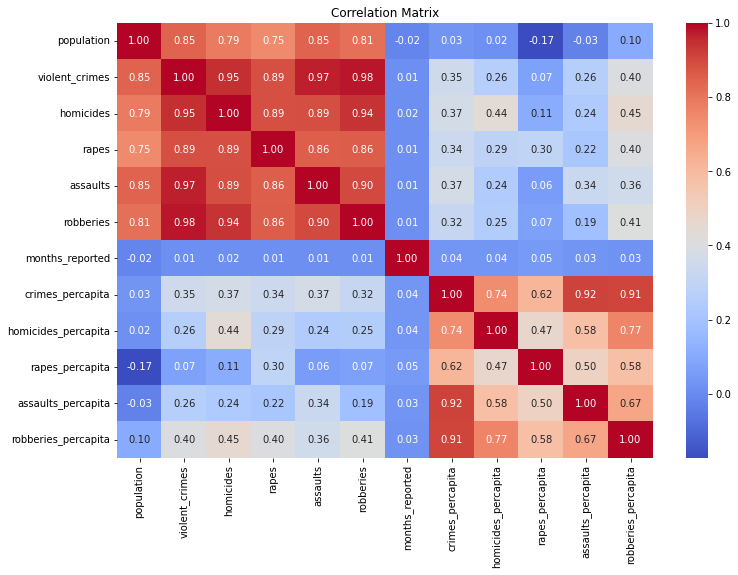

In [ ]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

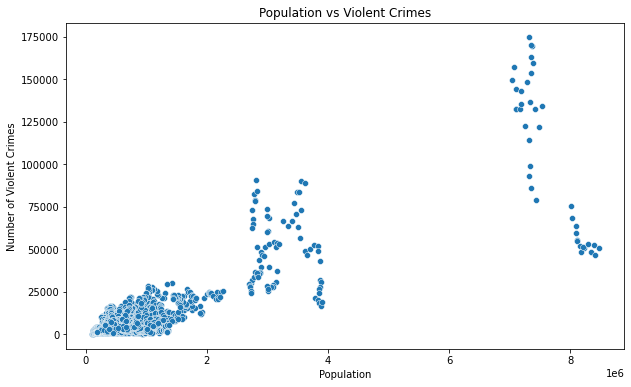

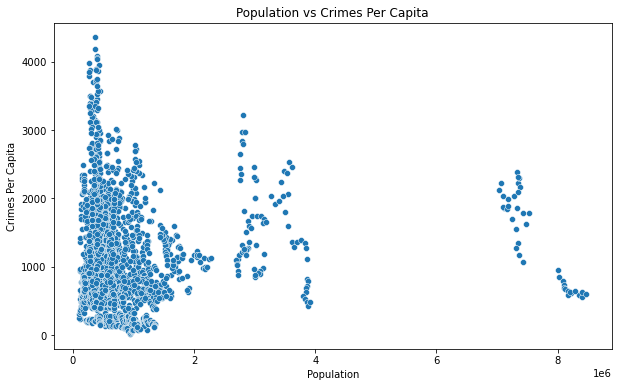

In [ ]:
# Scatter plot of population vs violent crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='population', y='violent_crimes')
plt.title('Population vs Violent Crimes')
plt.xlabel('Population')
plt.ylabel('Number of Violent Crimes')
plt.show()

# Scatter plot of population vs crimes per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='population', y='crimes_percapita')
plt.title('Population vs Crimes Per Capita')
plt.xlabel('Population')
plt.ylabel('Crimes Per Capita')
plt.show()

**Population vs Violent Crimes:**

There seems to be a general upward trend, indicating that as the population increases, the number of violent crimes also tends to increase.
However, there's significant scatter in the data, suggesting other factors beyond population influence crime rates.
There are a few outliers with high populations but relatively low crime rates, and vice versa.


**Population vs Crimes Per Capita:**

This plot shows a more complex relationship.
While there's some scatter, there's a general tendency for larger populations to have lower crime rates per capita.
There are also some clusters of data points indicating regions with similar crime rates despite varying populations.

**3. Results Interpretation and Strategies for Crime Prevention**

**Overall Trend:**

This Data Analysis illustrated four violent crimes (homicides, rapes, assaults, and robberies) over a span of approximately 40 years, ranging from 1975 to 2015.

**Crime Categories:**

*Homicides:* The homicide rate appears relatively low and stable throughout the analyzed period, with minimal fluctuations.
    
*Rapes:* Similar to homicides, the number of reported rapes remains consistently low, exhibiting little variation over the years.
    
*Assaults:* Assaults show a more pronounced pattern. There's a noticeable peak around the late 1980s, followed by a gradual decline until the mid-2000s. Subsequently, the assault rate stabilizes at a lower level.
    
*Robberies:* The robbery rate demonstrates a more substantial increase from the early years to the mid-1990s, reaching a peak around that time. Afterward, there's a steady decline, though the rate remains higher than its initial levels.

**Comparative Analysis:**
Comparing the crime categories, assaults and robberies exhibit the most significant fluctuations and overall higher numbers compared to homicides and rapes.
The peak in assaults and robberies during the late 1980s and early 1990s is a notable observation.

***Strategies for Crime Prevention***

**Understanding the Decline:**

The data indicates a significant decrease in violent crime rates after a peak in the mid-1990s. This suggests that certain strategies or societal changes implemented during that period were effective in reducing crime.

Potential Crime Prevention Strategies
Based on the observed trends, consider implementing the following strategies:

**1. Community-Oriented Policing:**
    
*Strengthen Community Relationships:* Foster trust and cooperation between law enforcement and the community.
    
*Neighborhood Watch Programs:* Encourage community involvement in crime prevention.
    
*Youth Programs:* Invest in programs that address the root causes of crime among young people, such as after-school activities, mentoring, and job training.
    
**2. Data-Driven Policing:**
    
*Crime Analysis:* Continuously analyze crime data to identify patterns, hotspots, and emerging trends.
    
*Predictive Policing:* Use data to predict crime hotspots and allocate resources accordingly.
    
Evaluation: Regularly assess the effectiveness of policing strategies and make adjustments as needed.
    
**3. Social and Economic Interventions:**
    
*Address Root Causes:* Implement programs that address poverty, unemployment, and inequality, which are often linked to crime.
    
*Education and Job Training:* Invest in education and job training programs to provide opportunities for at-risk youth and adults.
    
*Affordable Housing:* Support policies that promote affordable housing and prevent homelessness.